In [ ]:
import pandas as pd
from modality.annotation import get_transcripts

df_features = pd.read_pickle("rerun_CEGXRun1485.pickle")
transcripts = get_transcripts(
            reference="mm10",
            contig=None,
            start=None,
            end=None,
            as_pyranges=False,
        )
df_expression = pd.read_csv("../data/quant.sf", sep="\t")

In [5]:
def aggregate_expression(df_expression, transcripts, df_features):
    # Merging and calculating the summed TPM values in one line
    df_features["TPM"] = df_features["Gene_id"].map(
        df_expression
        .merge(transcripts[['id', 'parent', 'strand']], left_on='Name', right_on='id', how='left')
        .groupby('parent')['TPM']
        .sum()
    )

    # Filtering out rows with NaN values in the 'TPM' column
    return df_features[~df_features['TPM'].isna()]

In [6]:
merged_df = aggregate_expression(df_expression, transcripts, df_features)

gridsearch using the model below!!!

rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features(columns) dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries

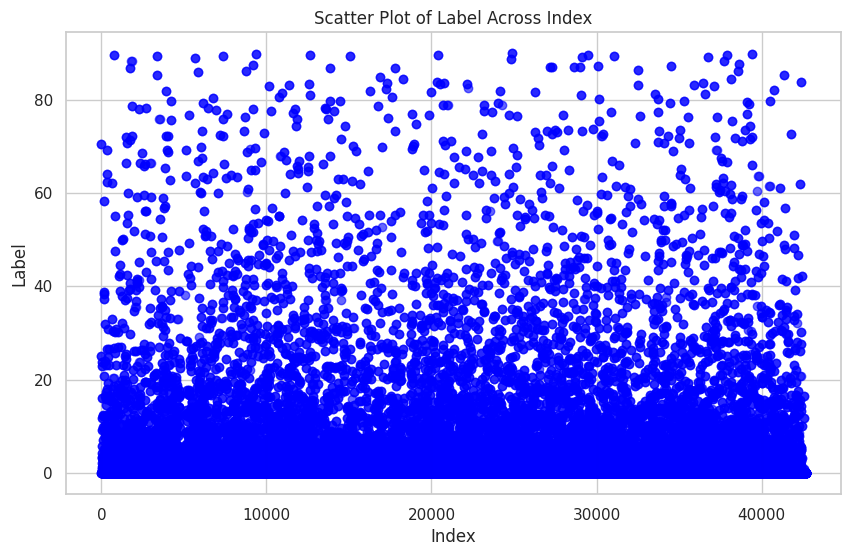

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


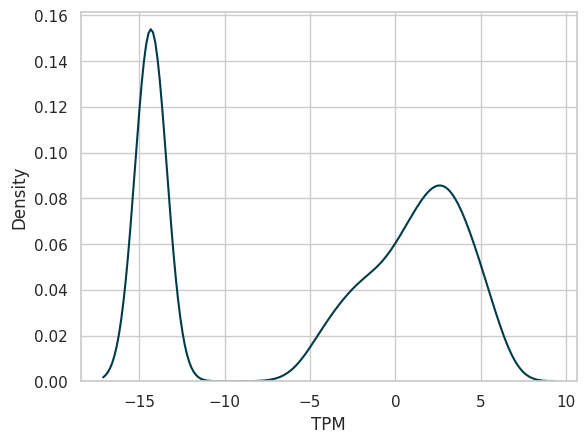

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

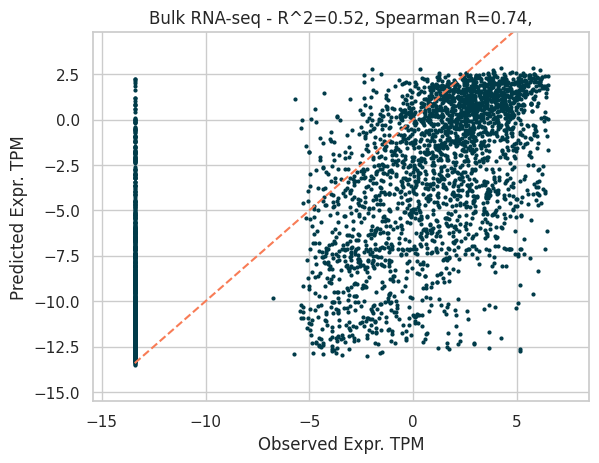

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

In [1]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

no smote, no stratify, with weights, binning after log_transform of y

| number_of_categories | accuracy | macro_f1 | auc     |
|----------------------|----------|----------|---------|
| 2                    | 0.822711 | 0.819200 | 0.914249|
| 3                    | 0.691199 | 0.655607 | 0.847979|
| 4                    | 0.583966 | 0.501392 | 0.795759|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features(columns) dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries

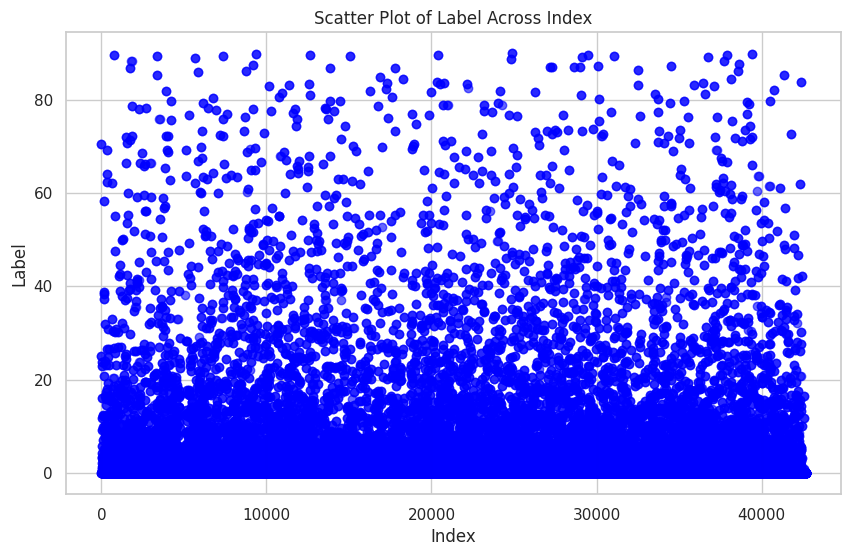

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


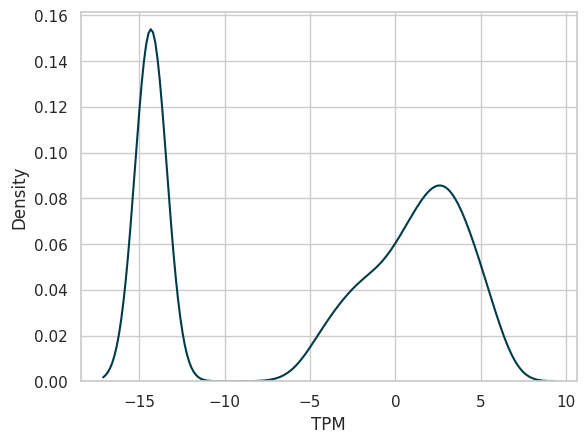

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

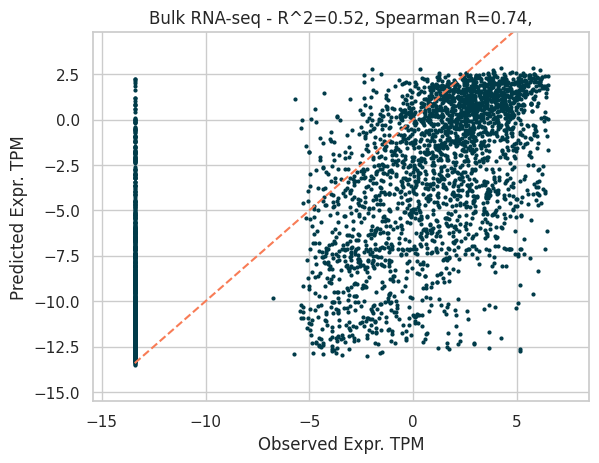

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

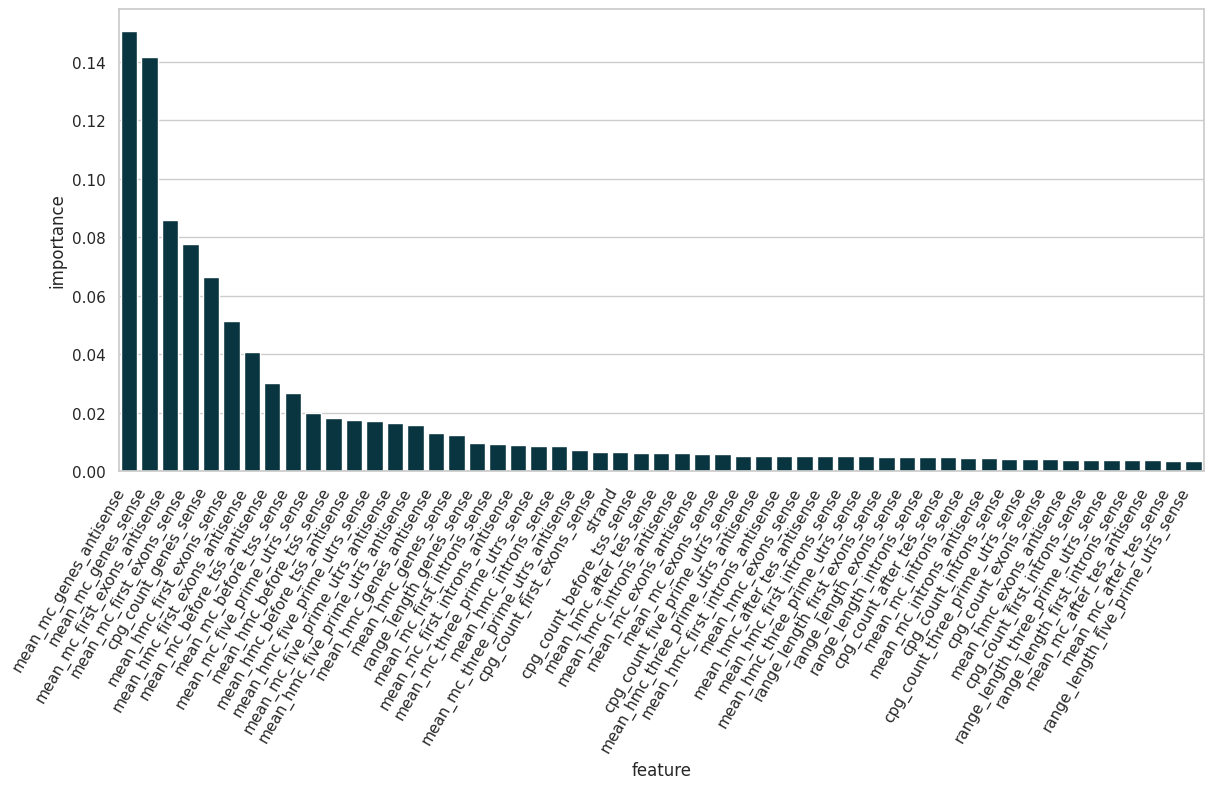

In [1]:
# from predict_gene import run_main
# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

no smote, no stratify, with weights, impute over all contigs

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.970410 | 0.538991 | 0.819142|
|          3           | 0.942084 | 0.323477 | 0.826736|
|          4           | 0.913505 | 0.271457 | 0.822229|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features(columns) dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries

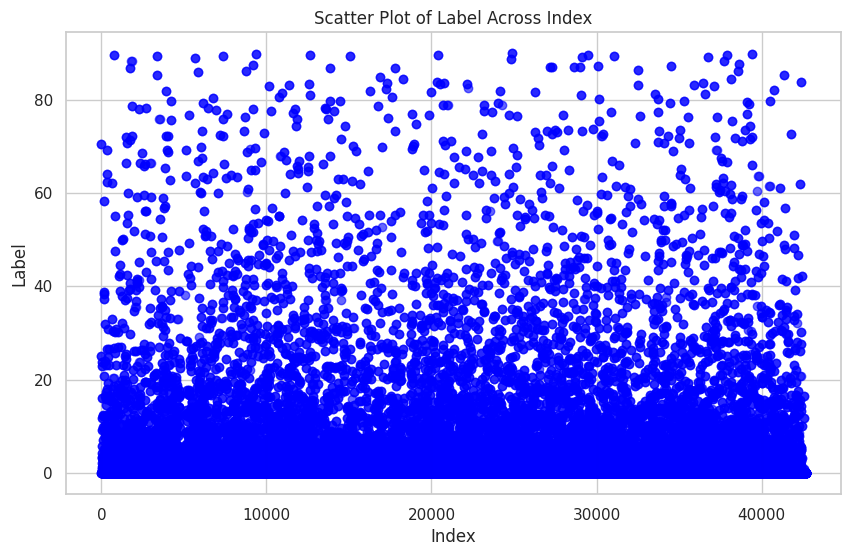

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


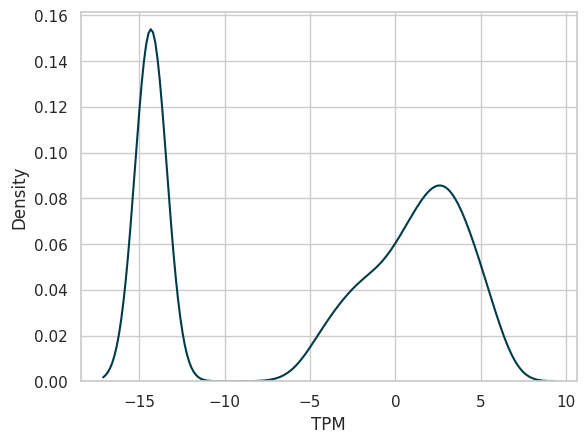

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

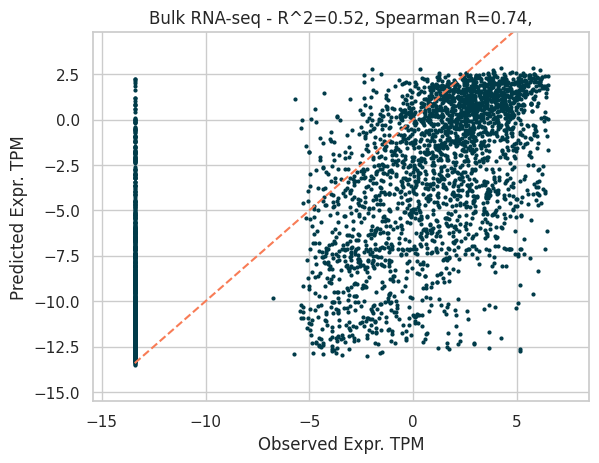

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

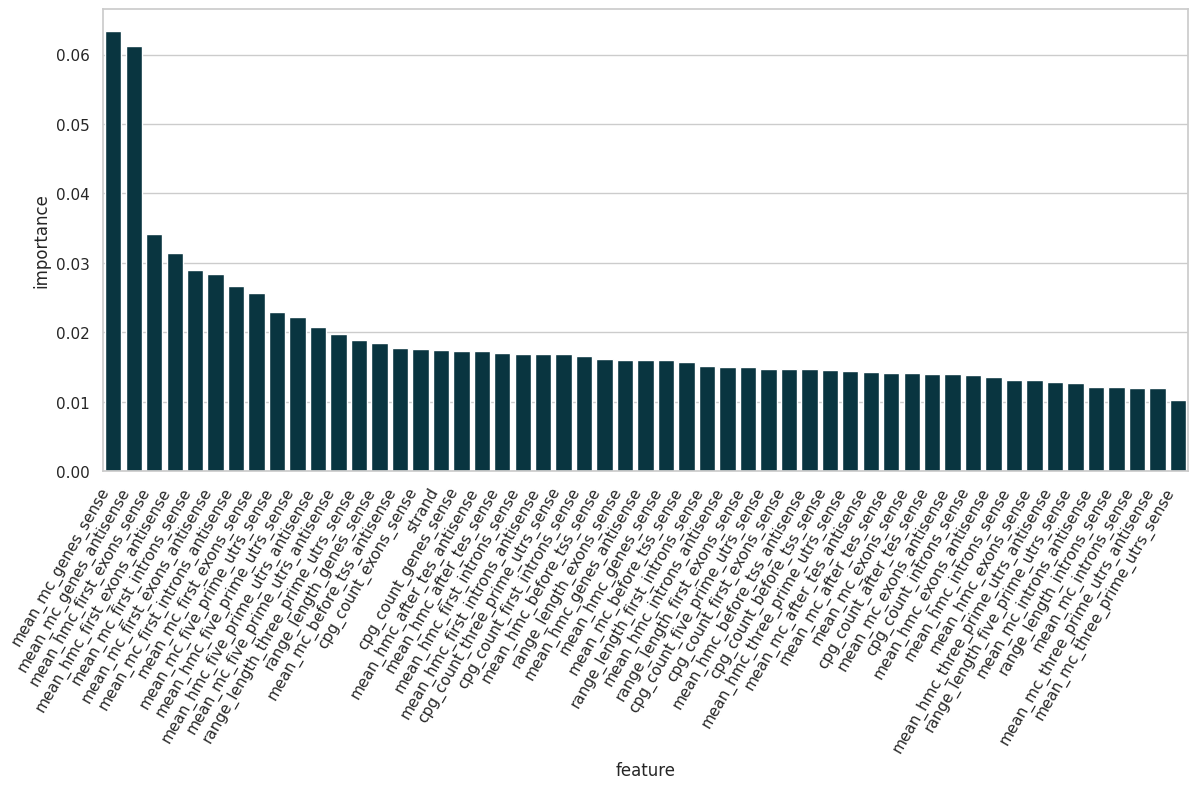

In [1]:

# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

no smote, no stratify, no weights, impute over all contigs

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.975315 | 0.493752 | 0.832705|
|          3           | 0.951889 | 0.325117 | 0.821427|
|          4           | 0.932242 | 0.241233 | 0.823572|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features(columns) dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 1 - target outliers
number of entries r

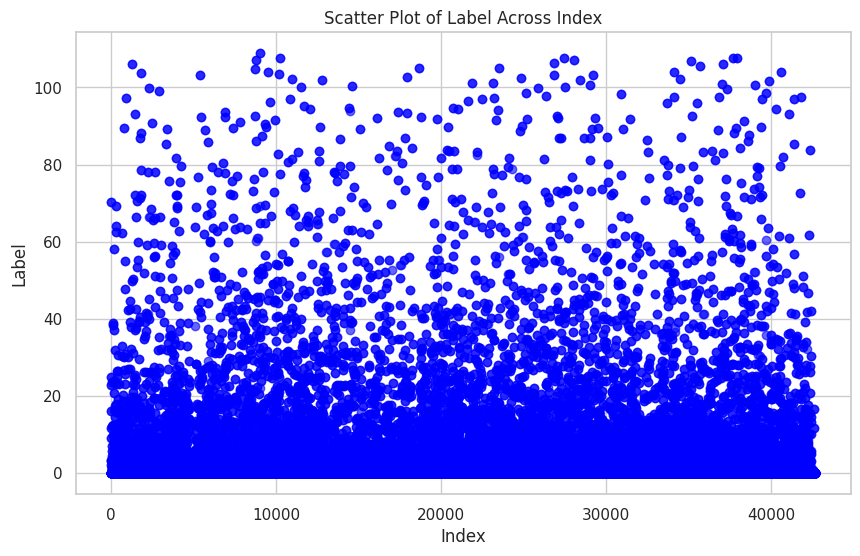

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


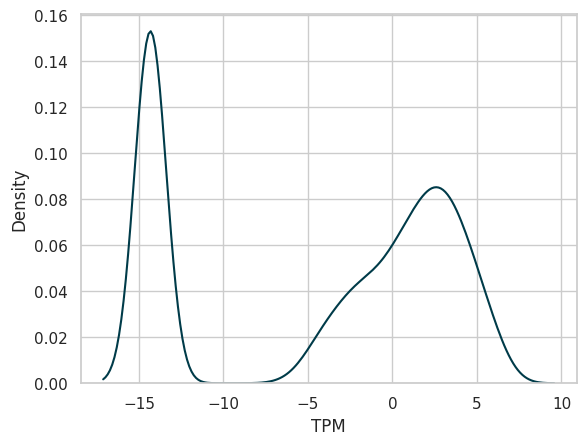

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

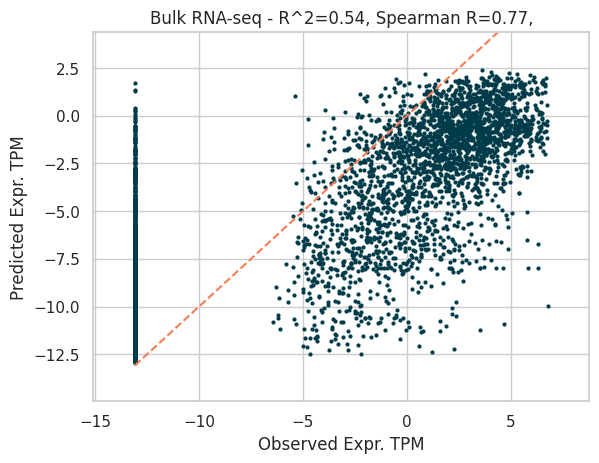

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

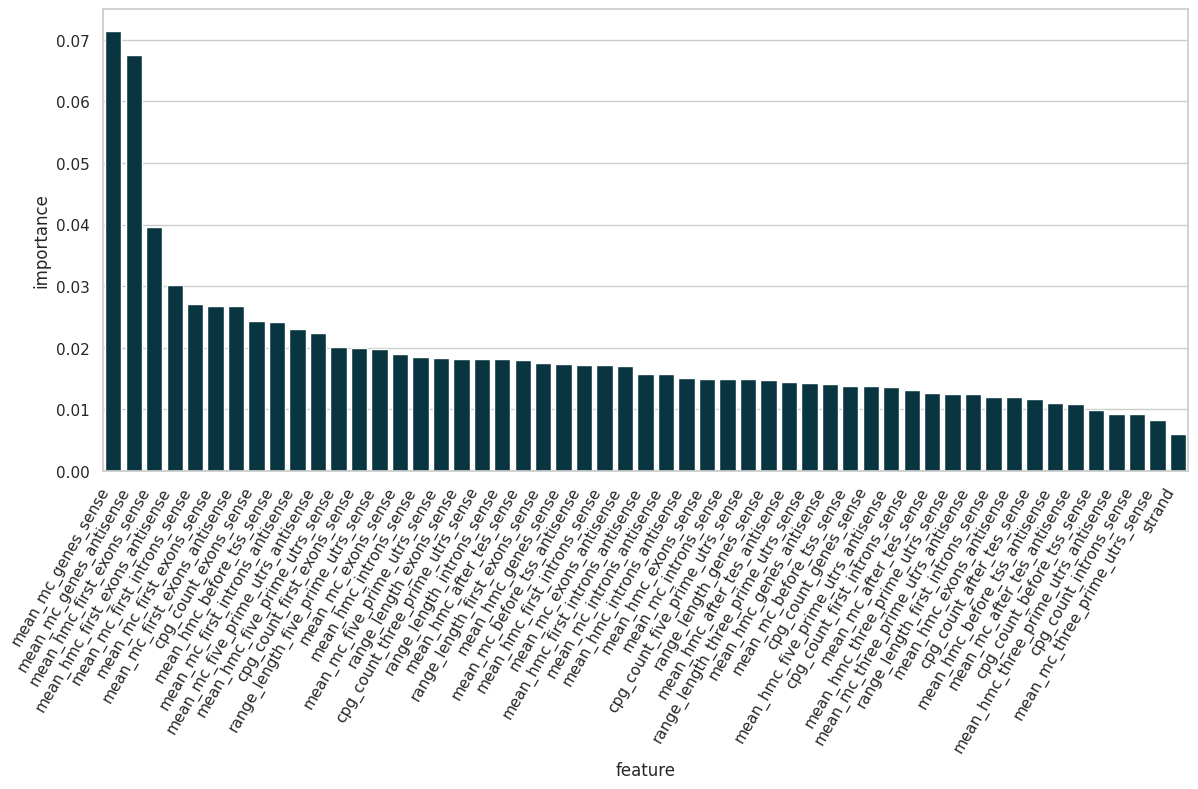

In [2]:
from predict_gene import run_main
# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

no smote, no stratify, no weights, expressed only, impute within each contig

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.964189 | 0.490884 | 0.771696|
|          3           | 0.923758 | 0.320123 | 0.773258|
|          4           | 0.892183 | 0.235755 | 0.767103|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
target filtered, TPM>0, shape:
(27653, 81)
TPM expression data loaded
shape: (27653, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 -

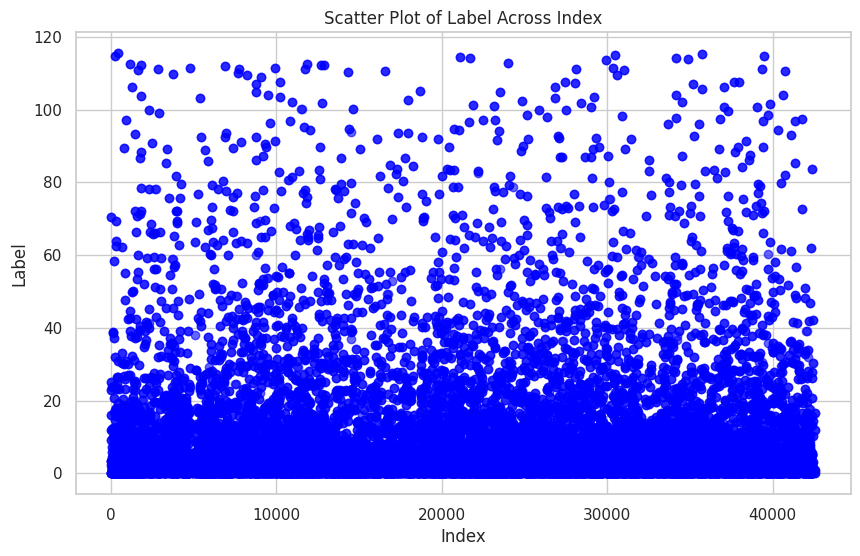

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


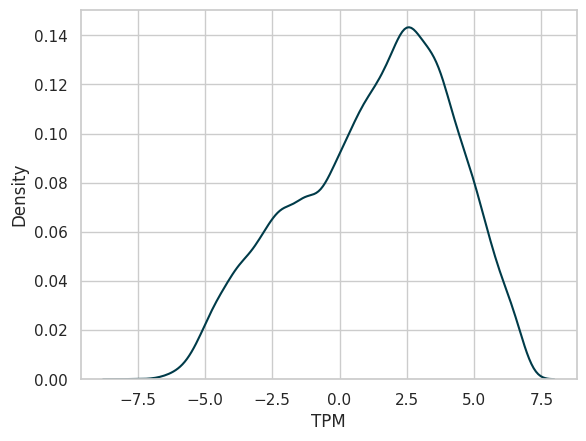

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

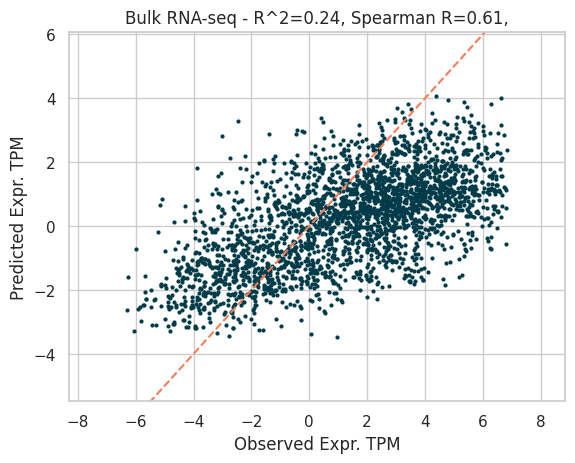

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

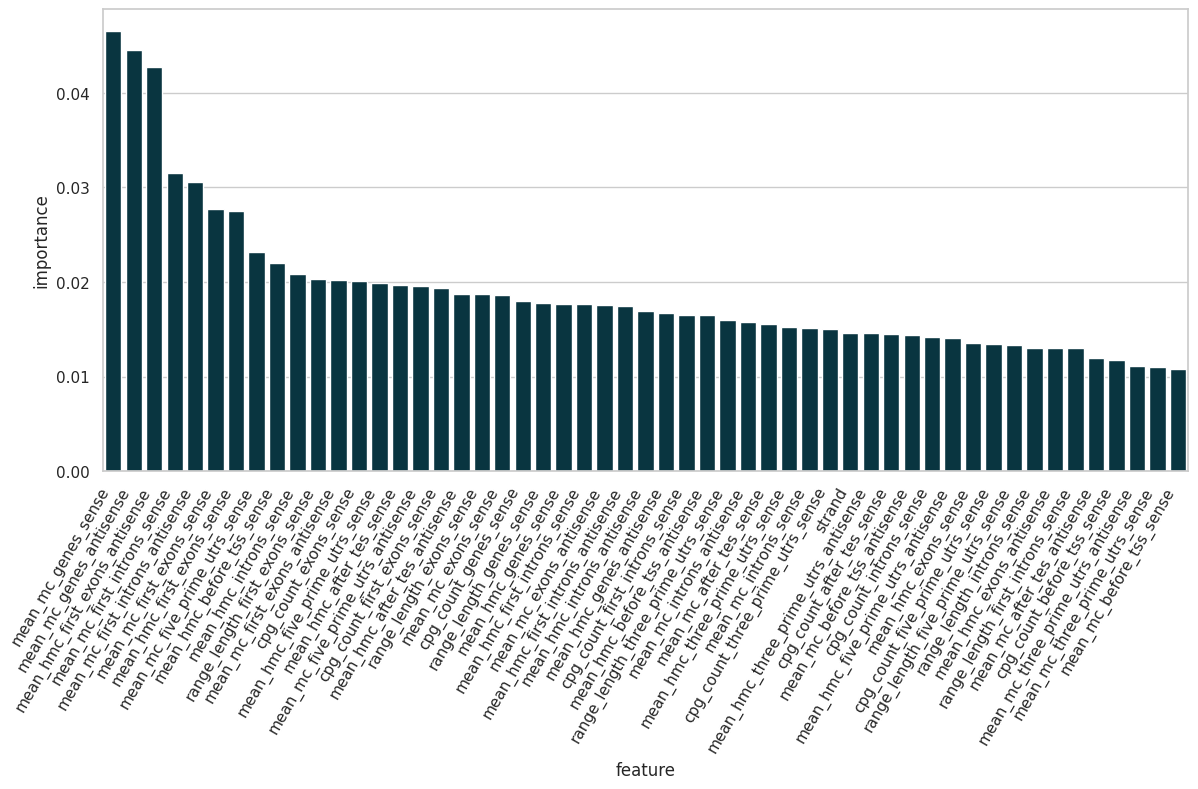

In [2]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",True)

NO SMOTE, No weights, No stratify, impute within each contig

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.971674 | 0.492817 | 0.851393|
|          3           | 0.942590 | 0.323482 | 0.839479|
|          4           | 0.917046 | 0.239182 | 0.840106|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries removed:

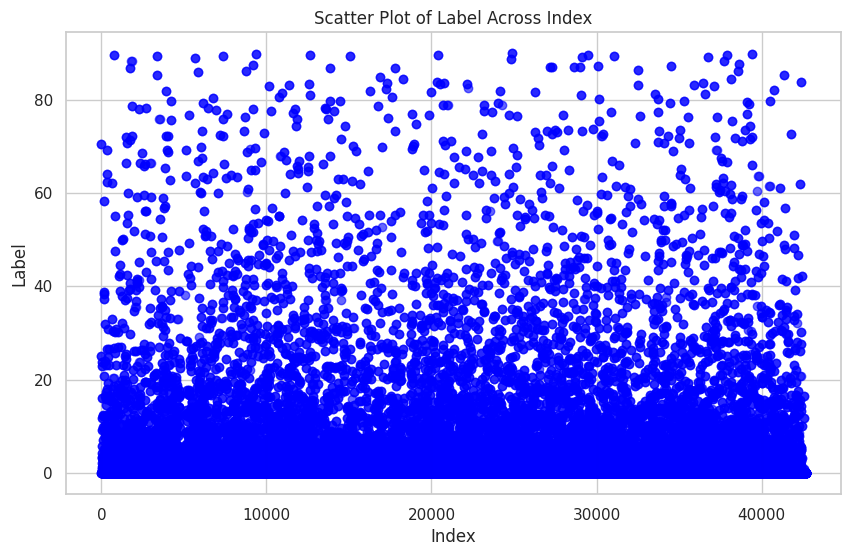

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


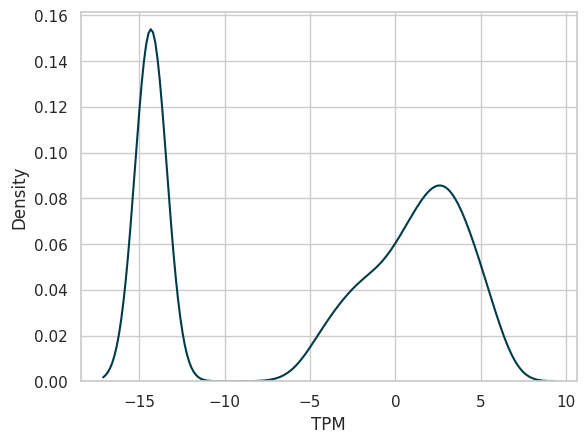

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

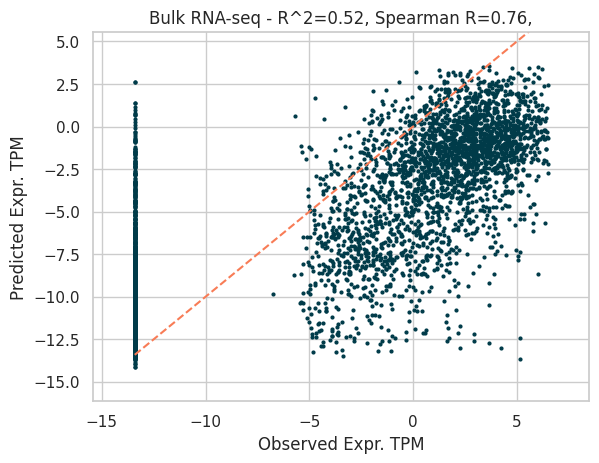

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

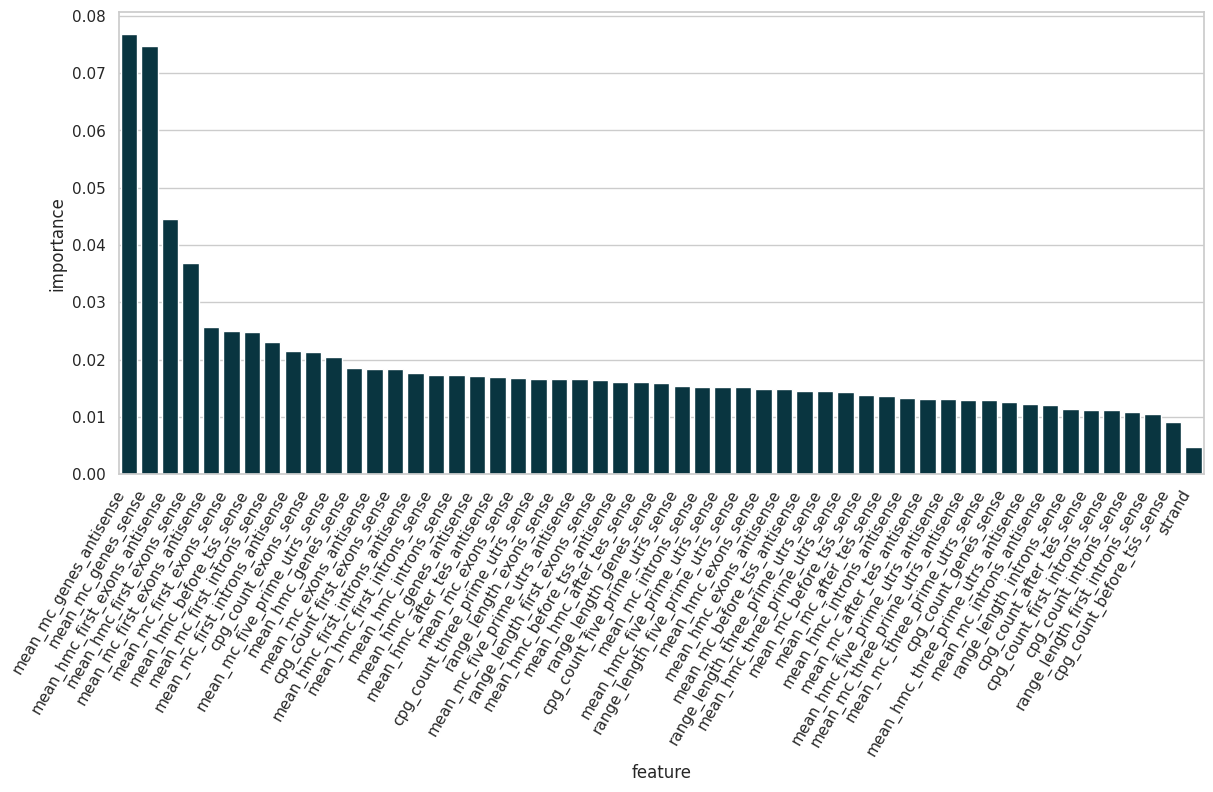

In [1]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

NO SMOTE, classifier with weight, NO STRATIFY, impute within each contig

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.954982 | 0.538962 | 0.813011|
|          3           | 0.910470 | 0.364799 | 0.808819|
|          4           | 0.882650 | 0.287266 | 0.812013|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries removed:

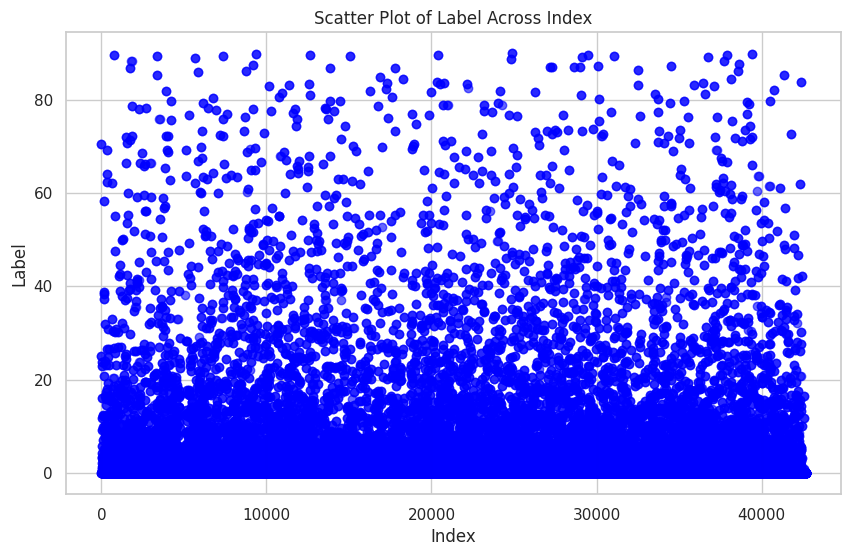

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


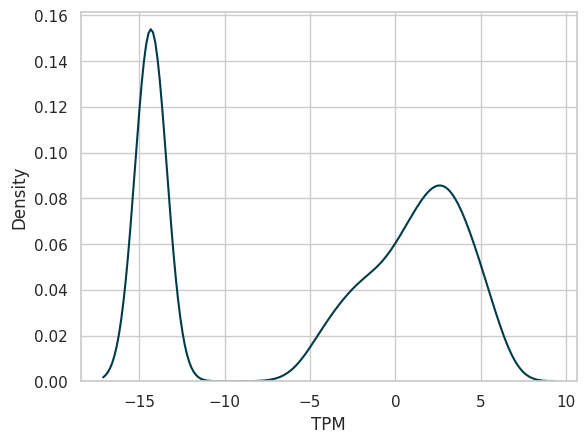

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

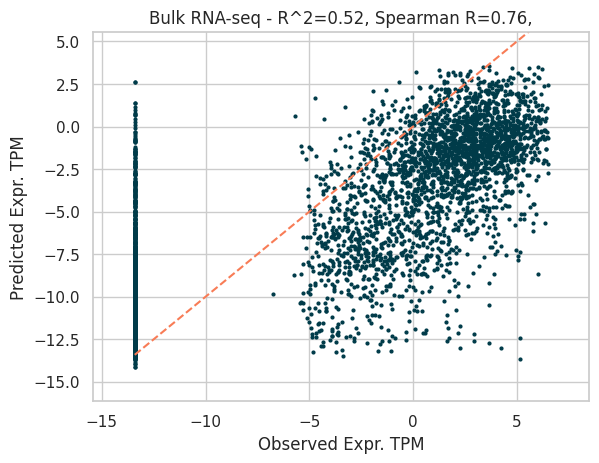

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

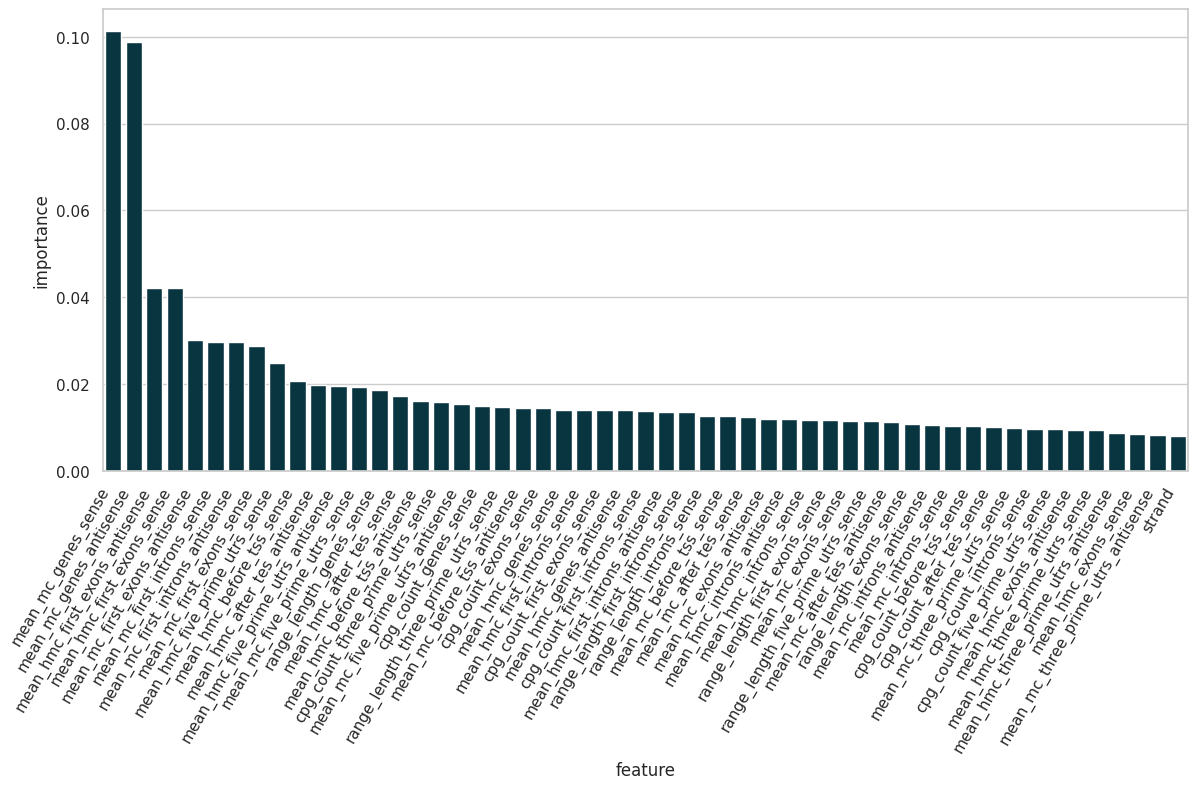

In [1]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

SMOTE, even weight, impute within each contig

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.870511 | 0.531119 | 0.777541|
|          3           | 0.839656 | 0.379486 | 0.775000|
|          4           | 0.798938 | 0.271695 | 0.756106|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries removed:

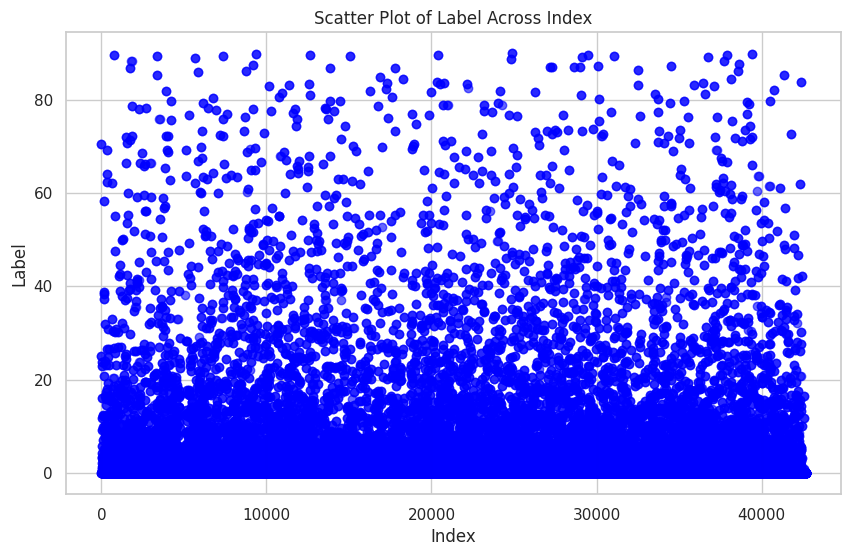

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


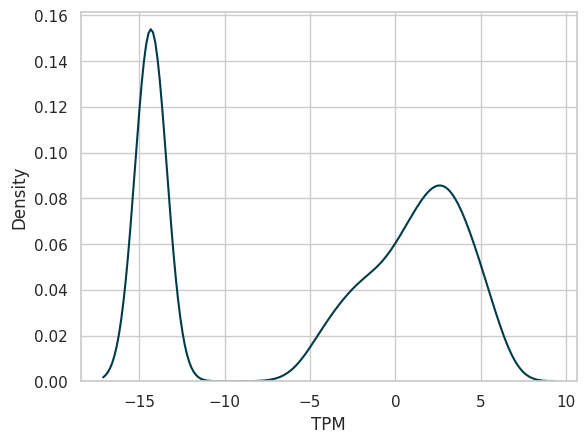

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

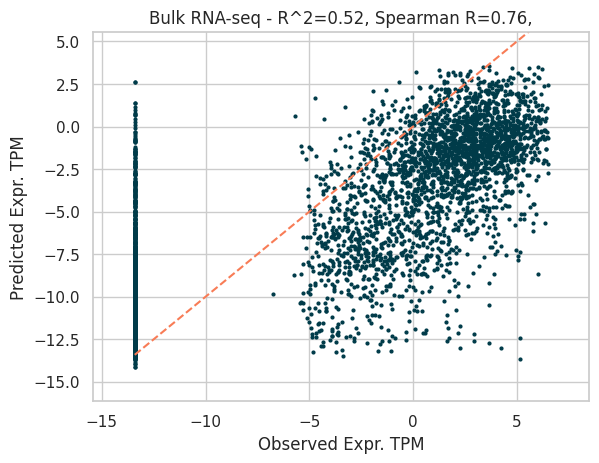

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

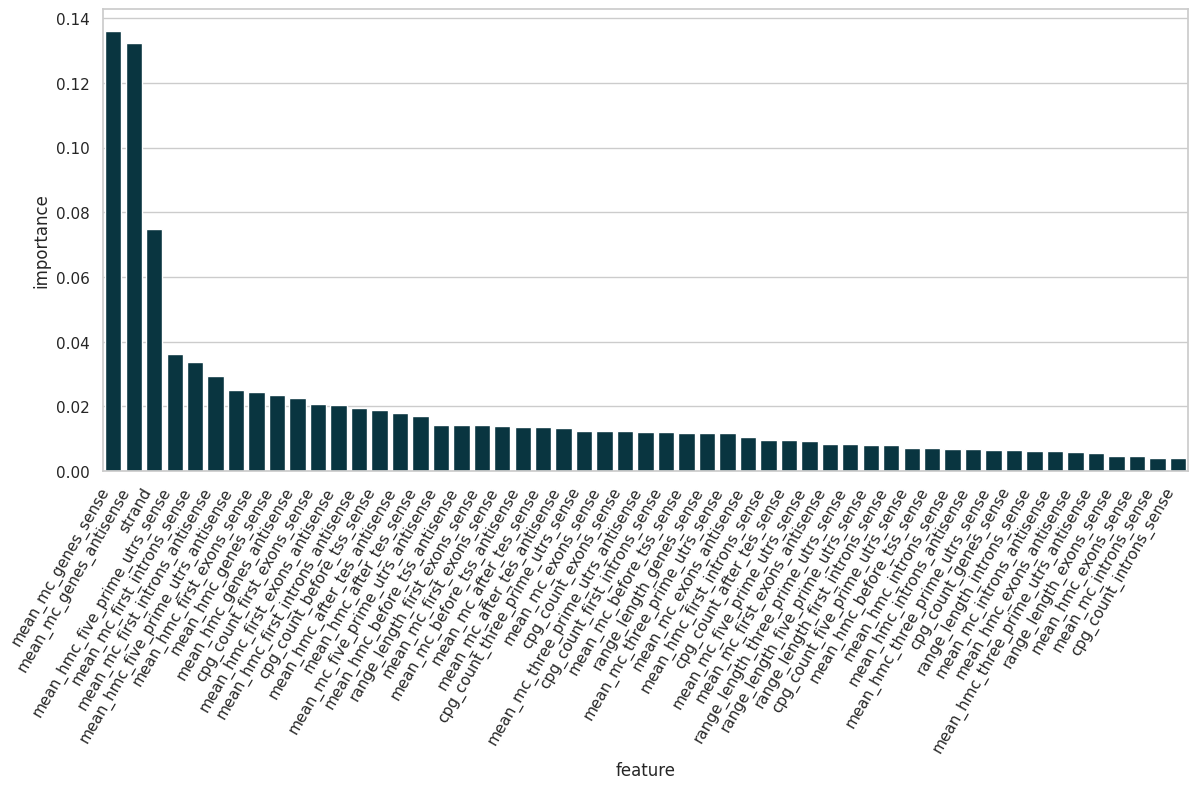

In [1]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

weights, no stratification

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.949218 | 0.582678 | 0.816743|
|          3           | 0.937184 | 0.349809 | 0.824990|
|          4           | 0.905415 | 0.313270 | 0.821409|
|          5           | 0.888568 | 0.219265 | 0.819669|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries removed:

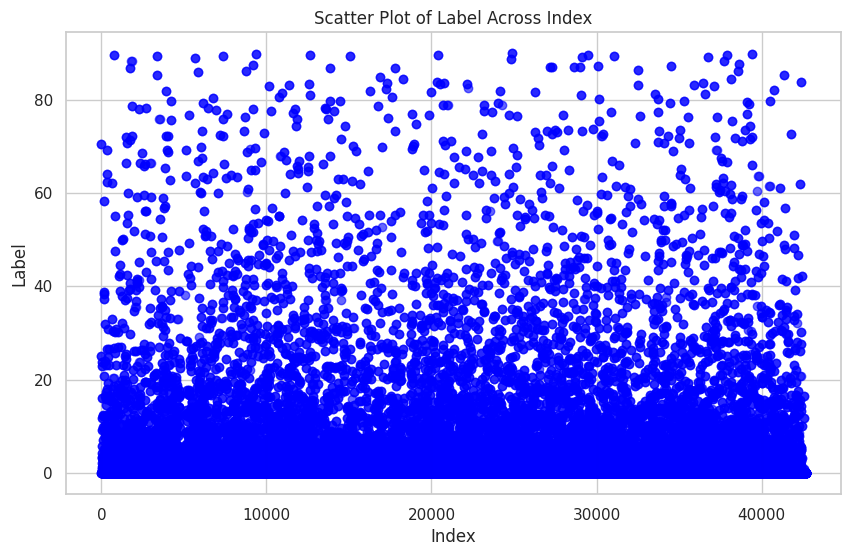

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


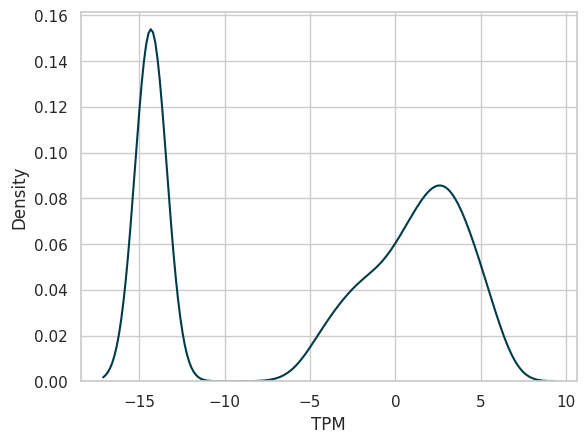

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

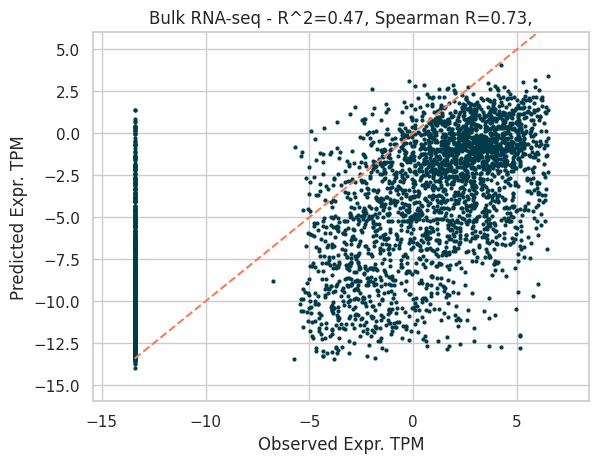

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

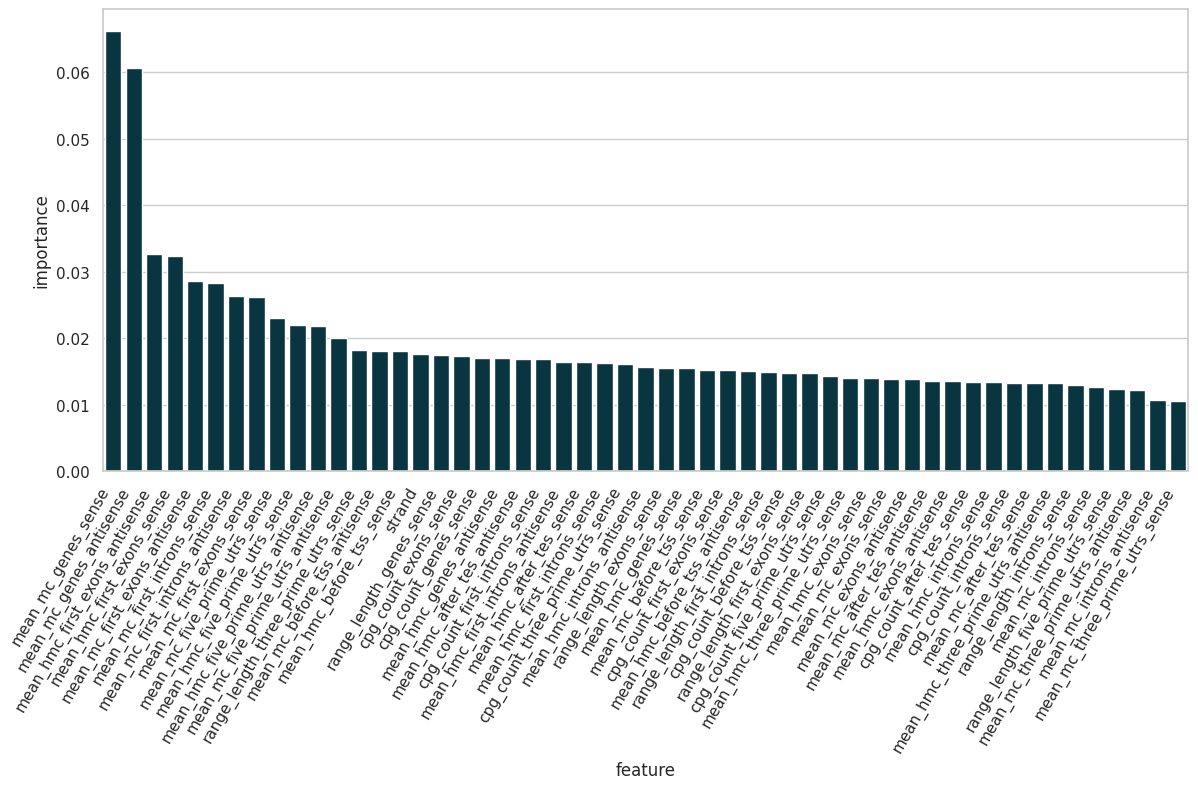

In [1]:
# from predict_gene import run_main
# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)


stratify by target

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.971841 | 0.492860 | 0.841300|
|          3           | 0.942960 | 0.330829 | 0.846873|
|          4           | 0.794705 | 0.281658 | 0.823337|
|          5           | 0.896992 | 0.198117 | 0.798103|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
TPM expression data loaded
shape: (42552, 81)
Nan features dropped: 81 --> 80
selected target unit: TPM
PREPROCESSING...
removing rows with TPM zscore > 0.8 - target outliers
number of entries removed:

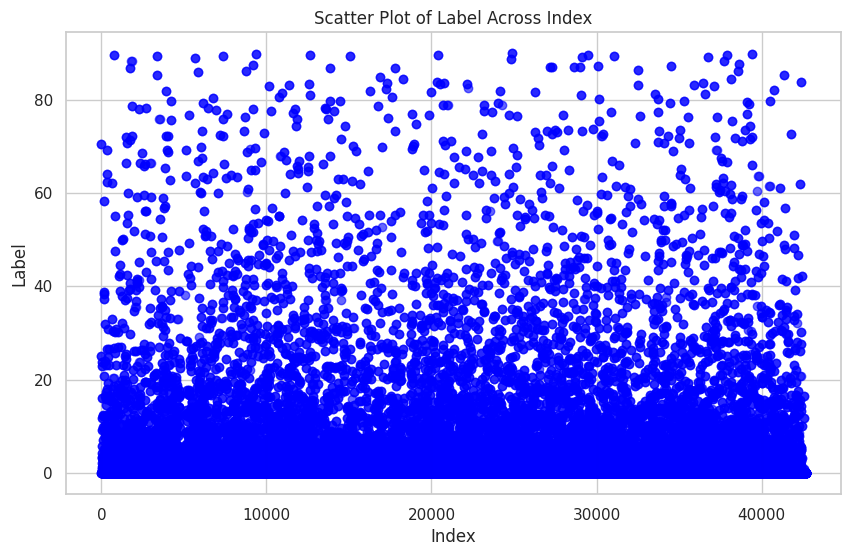

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


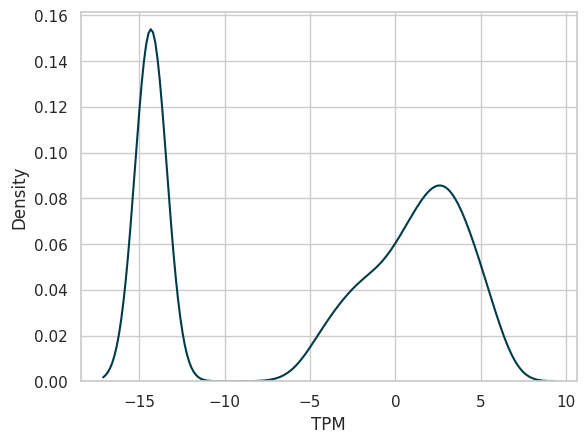

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

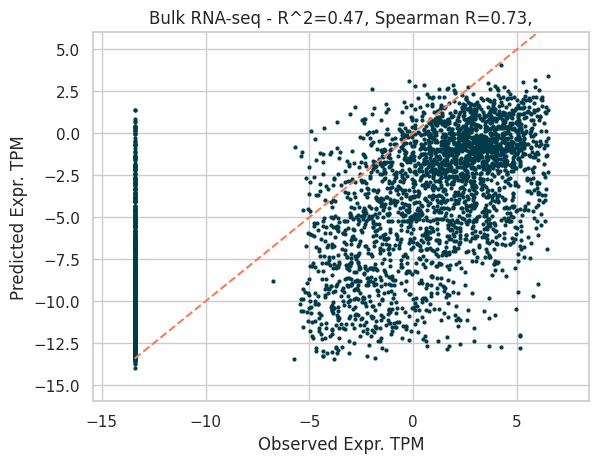

['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'mean_hmc_exons_antise

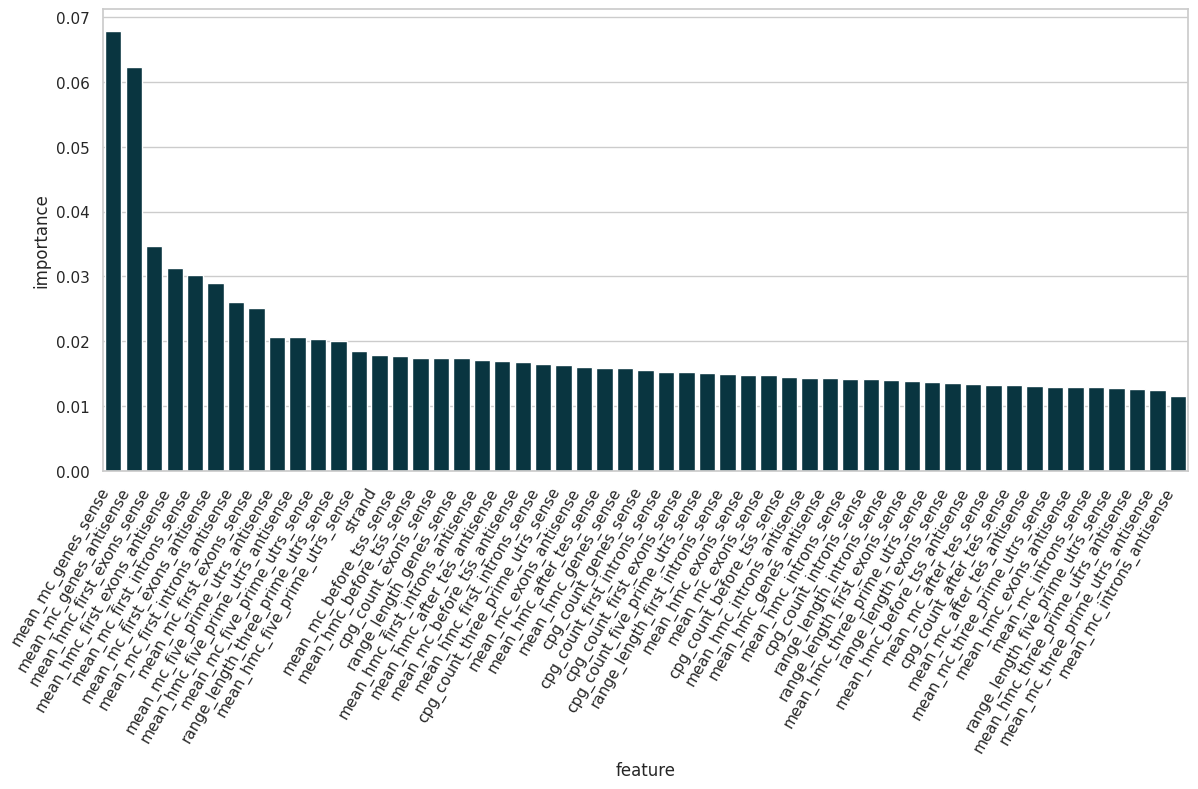

In [1]:
from predict_gene import run_main
run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)


no stratify, with weights

| number_of_categories | accuracy | macro_f1 |   auc   |
|----------------------|----------|----------|---------|
|          2           | 0.815162 | 0.813037 | 0.911725|
|          3           | 0.713117 | 0.659882 | 0.850985|
|          4           | 0.590132 | 0.457725 | 0.790284|
|          5           | 0.545126 | 0.387372 | 0.804098|


rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
                     Gene_id Chromosome     Start       End Gene_name contig  \
0      ENSMUSG00000025903.14          1   4807787   4848409    Lypla1      1   
1      ENSMUSG00000025903.14          1  

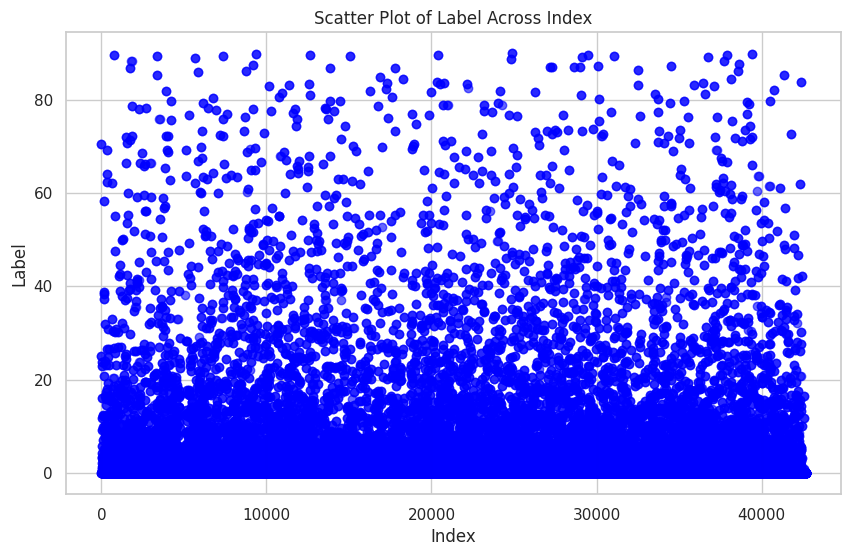

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]


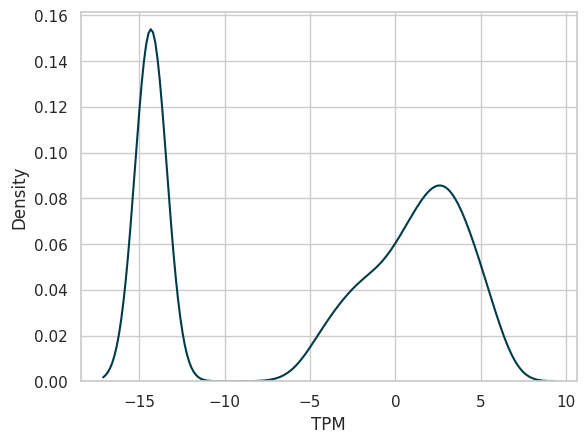

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

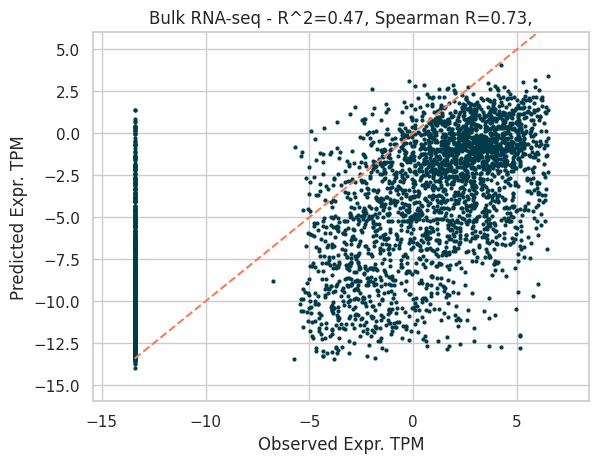

training 2 category model with {'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
[0, 1]
TPM
1    22693
0    14604
Name: count, dtype: int64 [-14.33943525  -3.91418692   6.49025253]
in run_classifier:
TPM
1    22693
0    14604
Name: count, dtype: int64
0.0 is null
binary:  2
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
calculating class weights
0: 1.276944672692413
1: 0.8217732340369277
training 3 category model with {'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
[0, 1, 2]
TPM
2    17242
0    13424
1     6631
Name: count, dtype: int64 [-14.33943525  -7.3823334   -0.44604044   6.49025253]
in run_classifier:
TPM
2    17242
0    13424
1    

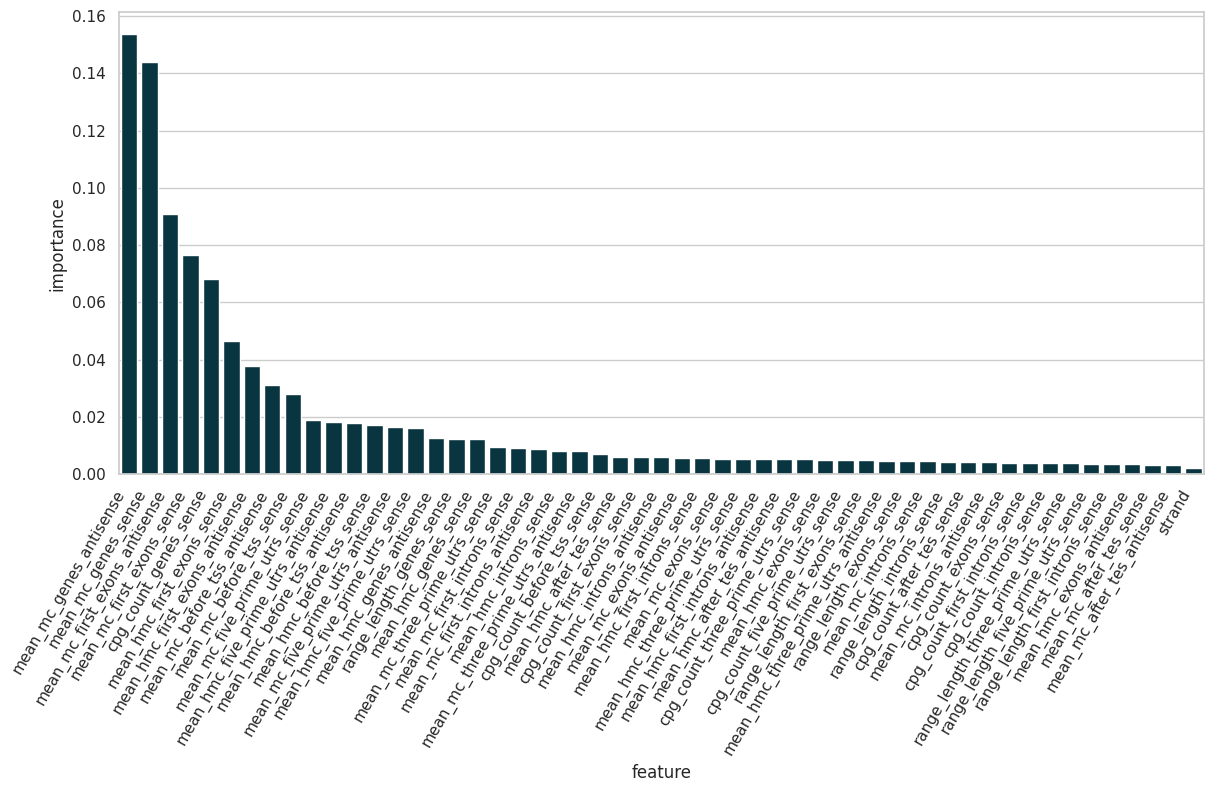

In [1]:
from predict_gene import run_main

# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",False)

rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
target loaded, shape:
(42552, 81)
                     Gene_id Chromosome     Start       End Gene_name contig  \
0      ENSMUSG00000025903.14          1   4807787   4848409    Lypla1      1   
1      ENSMUSG00000025903.14          1  

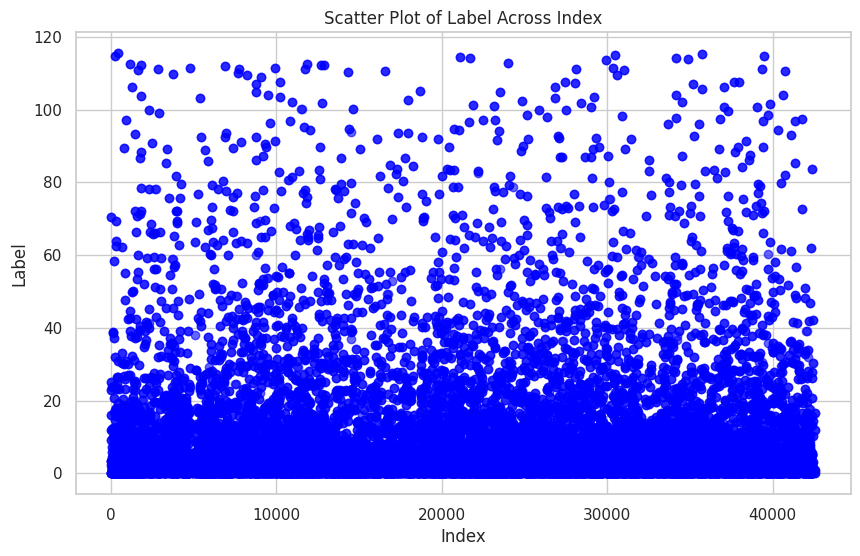

minimum non-zero value: 0.004894, using 4.894e-05 as a constant for log transform [plotting only]
Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 

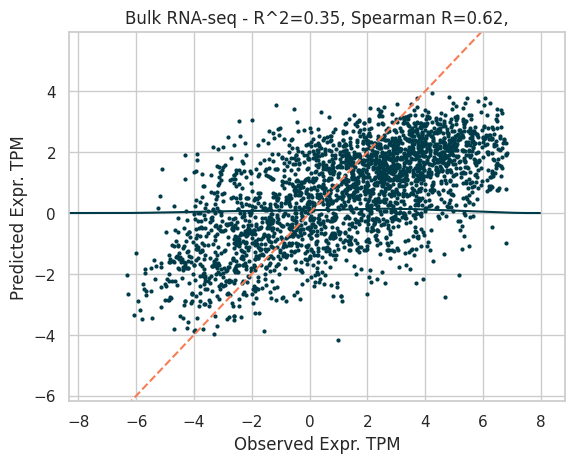

training 2 category model with {'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
[0, 1]
TPM
1    17467
0     6655
Name: count, dtype: int64
in run_classifier:
TPM
1    17467
0     6655
Name: count, dtype: int64
0.0 is null
binary:  2
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
calculating class weights
0: 1.812321562734786
1: 0.6905020896547776
classifier results:
  number_of_categories  accuracy  macro_f1       auc
0                    2  0.774397  0.761918  0.843425
Best performing classifier: 2 categories
                            feature  importance
9     mean_mc_first_exons_antisense    0.170876
4         mean_mc_first_exons_sense    0.164192
27   mean_hmc_first_exons_antisense    0.086991
22      

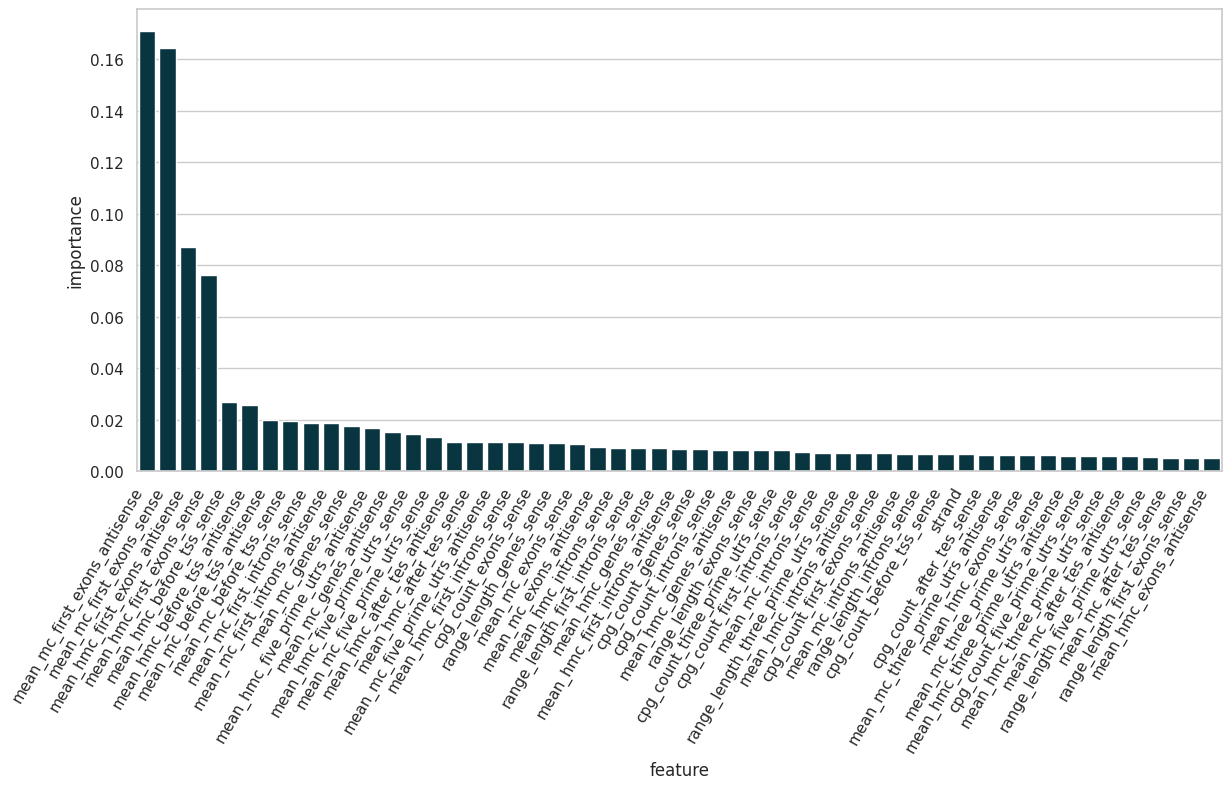

In [2]:
from predict_gene import run_main

run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",True)

using expressed only tpms, gridsearched over regressor transferred weights on to classifier

rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
all transcripts (40524, 25)
full_selected_transcript (40524, 27)
target loaded, shape:
(79497, 8)
target filtered, TPM>0, shape:
(25956, 8)
TPM expression data loaded
features and target merged:                      Gene_id Chromosome 

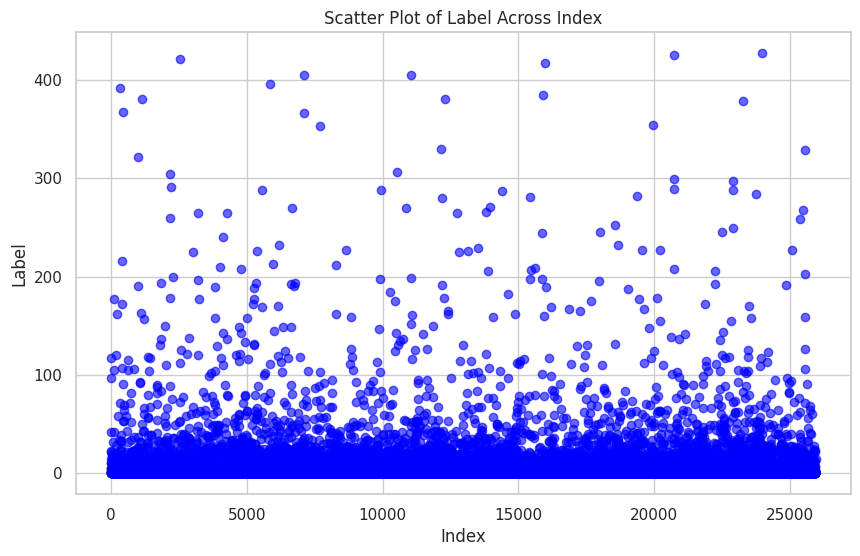

Columns with nan values:Index([], dtype='object')
Training with 47 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_genes_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_genes_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_five_prime_utrs_sense', 'mean_hmc_three_prime_utrs_sense', 'cpg_count_before_tss_sense', 'cpg_count_after_tes_sense', 'cpg_count_genes_sense', 'cpg_count_first_exons_sense', 'cpg_count_first_introns_sense', 'cpg_count_exons_sense', 'cpg_count_introns_sense', 'cpg_count_five_prime_utrs_sense', 'cpg_count_three_prime_utrs_sense', 'range_length_genes_sense', 'range_length_first_exons_sense', 'range_

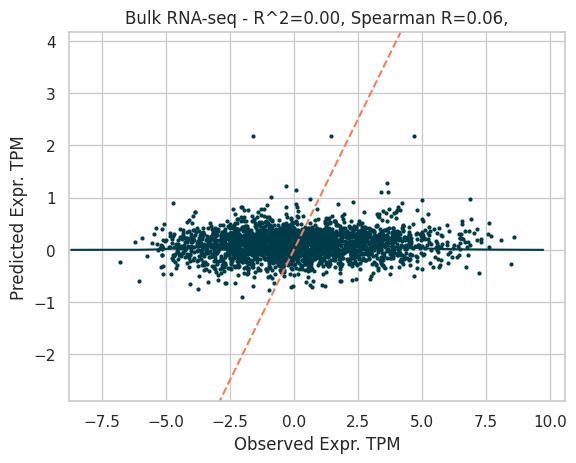

training 2 category model with {'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.7}
[0, 1]
TPM
0    13093
1    10172
Name: count, dtype: int64
in run_classifier:
TPM
0    13093
1    10172
Name: count, dtype: int64
0.0 is null
binary:  2
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.7}
Using params
{'n_estimators': 600, 'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.7}
calculating class weights
0: 0.8884518444970595
1: 1.143580416830515
classifier results:
  number_of_categories  accuracy  macro_f1       auc
0                    2  0.548921  0.530292  0.548204
Best performing classifier: 2 categories
                                feature  importance
33             range_length_exons_sense    0.029192
36  range_length_three_prime_utrs_sense    0.029017
10       mean_mc_three_prime_utrs_sense    0.02

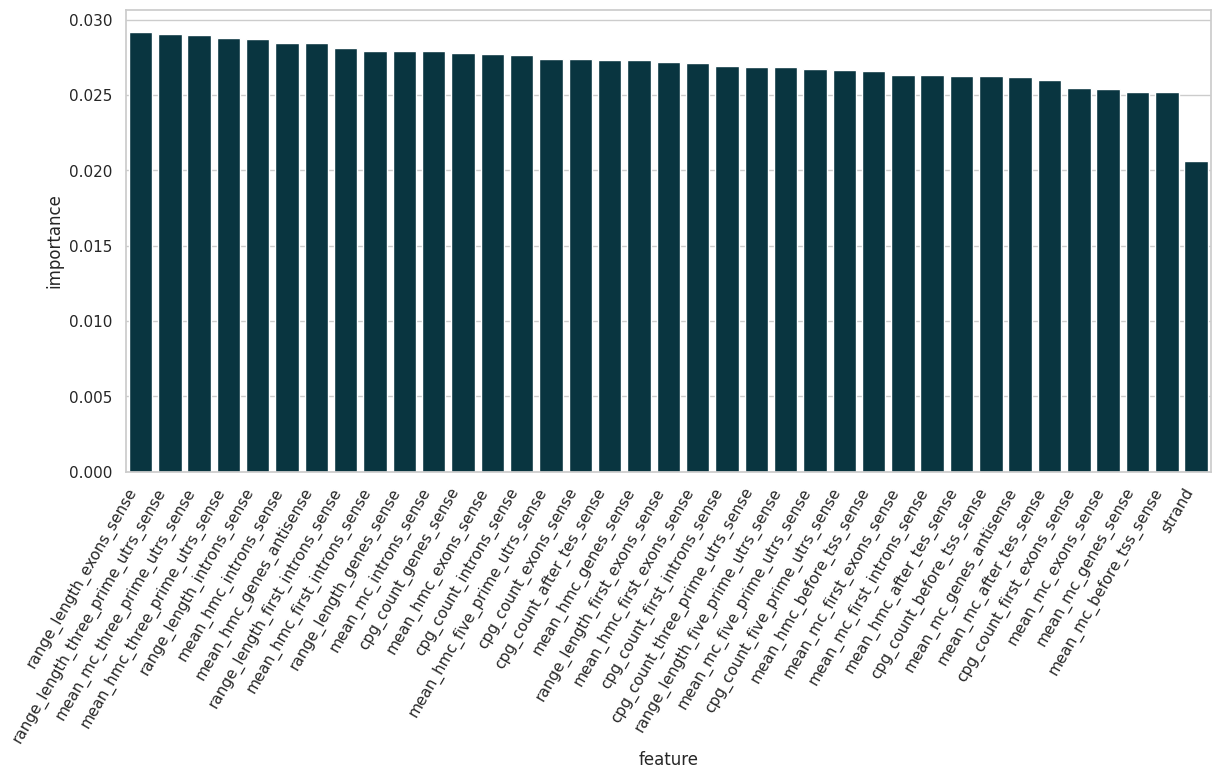

In [2]:
# from predict_gene import run_main

# run_main("rerun_CEGXRun1485.pickle","../data/quant.sf",["mc", "hmc"], "TPM",True)

rerun_CEGXRun1485.pickle features loaded
loading gene annotation mm10
transcript downloaded, selected transcripts:                      gene_id          transcript_id
0       ENSMUSG00000000001.4   ENSMUST00000000001.4
1      ENSMUSG00000000003.15  ENSMUST00000000003.13
2      ENSMUSG00000000028.15  ENSMUST00000000028.13
3      ENSMUSG00000000037.17   ENSMUST00000101113.8
4      ENSMUSG00000000049.11   ENSMUST00000000049.5
...                      ...                    ...
21536   ENSMUSG00000118623.1   ENSMUST00000124129.7
21537   ENSMUSG00000118638.1   ENSMUST00000239206.1
21538   ENSMUSG00000118640.1   ENSMUST00000239185.1
21539   ENSMUSG00000118646.1   ENSMUST00000239481.1
21540   ENSMUSG00000118653.1   ENSMUST00000239472.1

[21541 rows x 2 columns]
rpm expression data loaded
Gene                    False
Chromosome              False
Start                   False
End                     False
Orientation             False
E14_rep_1 (log2 RPM)    False
E14_rep_2 (log2 RPM)    Fals

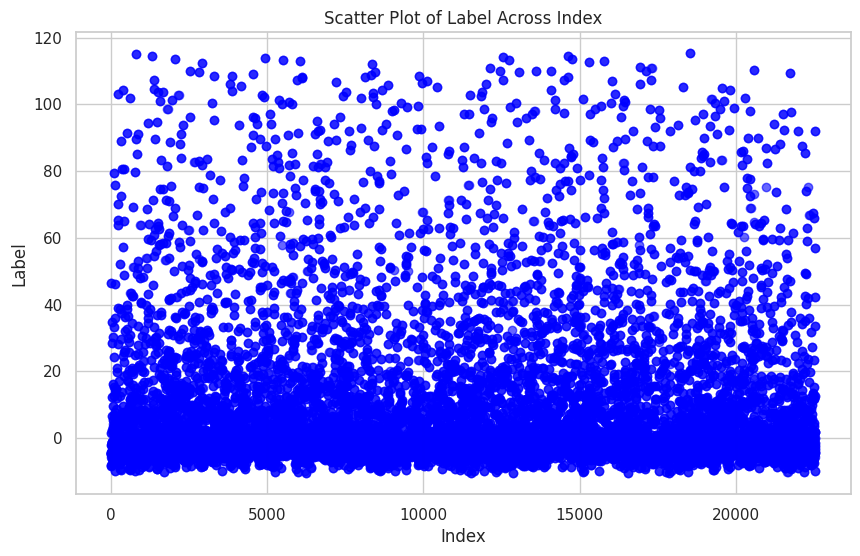

Columns with nan values:Index([], dtype='object')
Training with 71 features...
['strand', 'mean_mc_before_tss_sense', 'mean_mc_after_tes_sense', 'mean_mc_genes_sense', 'mean_mc_first_exons_sense', 'mean_mc_first_introns_sense', 'mean_mc_before_tss_antisense', 'mean_mc_after_tes_antisense', 'mean_mc_genes_antisense', 'mean_mc_first_exons_antisense', 'mean_mc_first_introns_antisense', 'mean_mc_exons_sense', 'mean_mc_introns_sense', 'mean_mc_five_prime_utrs_sense', 'mean_mc_three_prime_utrs_sense', 'mean_mc_exons_antisense', 'mean_mc_introns_antisense', 'mean_mc_five_prime_utrs_antisense', 'mean_mc_three_prime_utrs_antisense', 'mean_hmc_before_tss_sense', 'mean_hmc_after_tes_sense', 'mean_hmc_genes_sense', 'mean_hmc_first_exons_sense', 'mean_hmc_first_introns_sense', 'mean_hmc_before_tss_antisense', 'mean_hmc_after_tes_antisense', 'mean_hmc_genes_antisense', 'mean_hmc_first_exons_antisense', 'mean_hmc_first_introns_antisense', 'mean_hmc_exons_sense', 'mean_hmc_introns_sense', 'mean_hmc_fi

ValueError: 'list' argument must have no negative elements

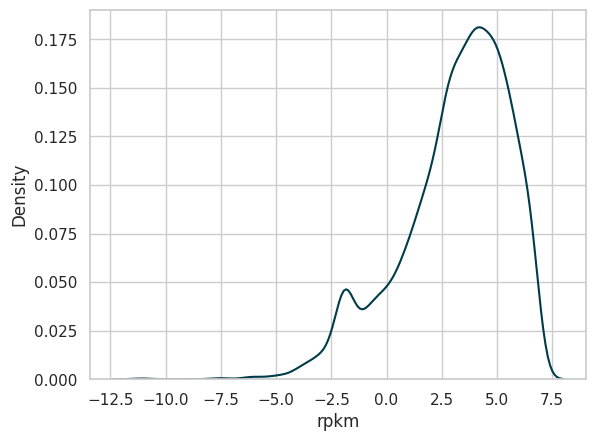

In [1]:
from predict_gene import run_main
meth_features = "rerun_CEGXRun1485.pickle"
rna_data_path = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE135nnn/GSE135509/suppl/GSE135509_Quantified_data_bulk_RNA-seq_E14_and_SAM_mESCs.txt.gz"

run_main(meth_features,rna_data_path,["mc", "hmc"], "rpkm")